       Revenues ($M)  Profits ($M)   Assets ($M)  Mkt Value as of 3/29/18 ($M)
count    1000.000000    998.000000  1.000000e+03                    951.000000
mean    14378.202400   1111.772545  4.602315e+04                  26257.509989
std     30835.849087   3477.027544  1.992486e+05                  66026.550320
min      1848.000000  -6798.000000  4.790000e+02                      0.000000
25%      2886.500000     96.900000  3.498250e+03                   3070.000000
50%      5417.000000    321.050000  8.370500e+03                   8523.000000
75%     12108.750000    971.450000  2.371225e+04                  21593.500000
max    500343.000000  48351.000000  3.345529e+06                 851318.000000


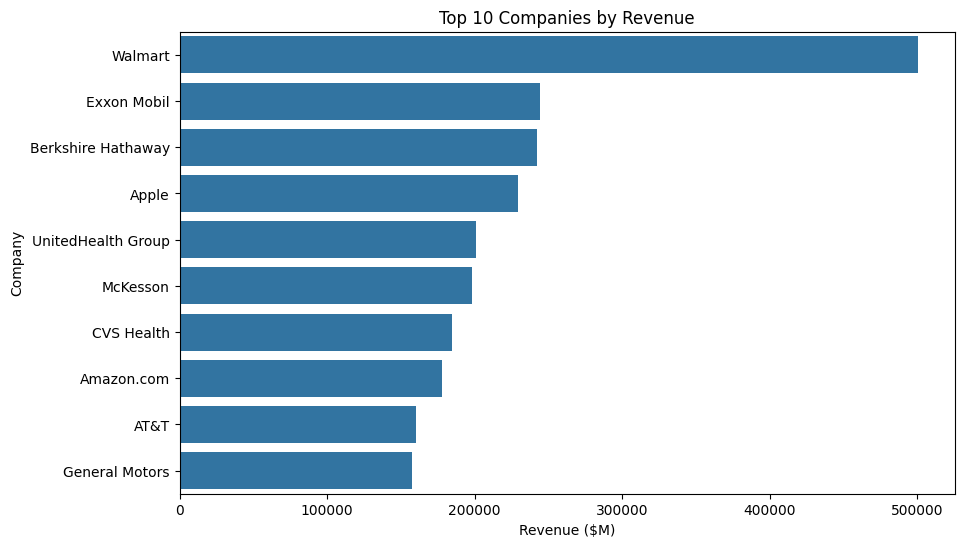

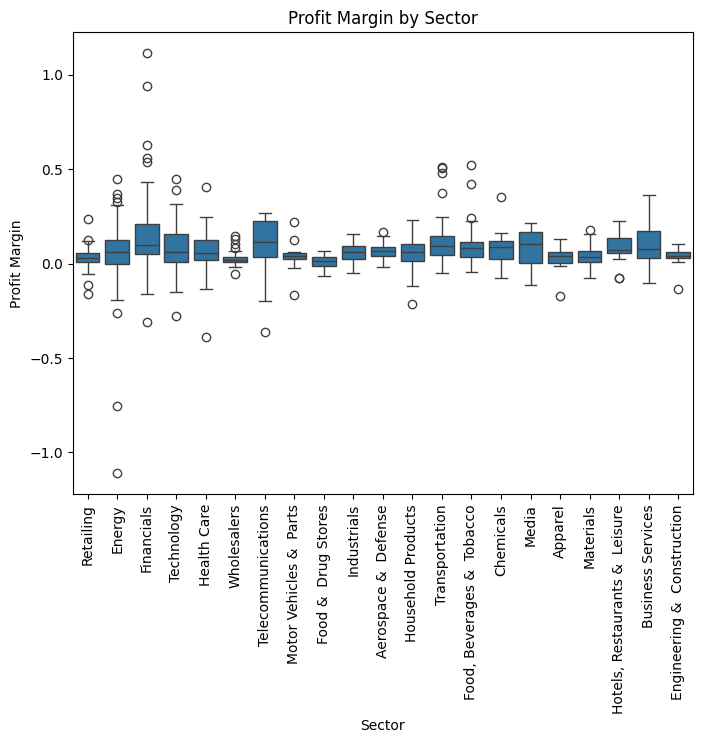

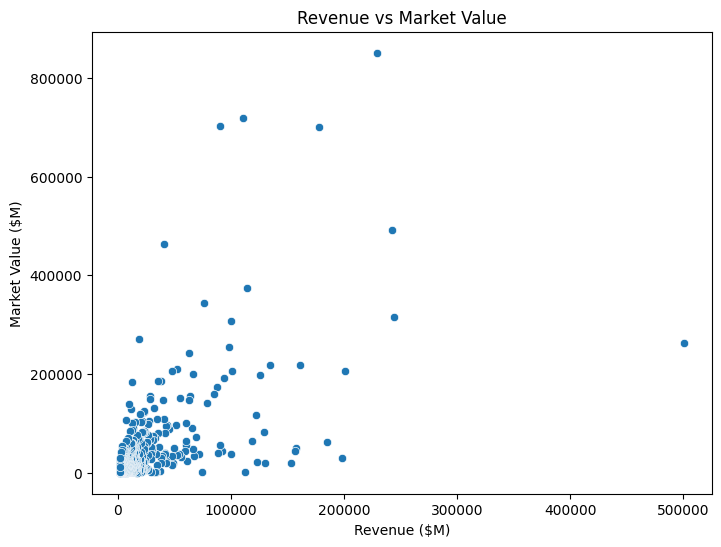

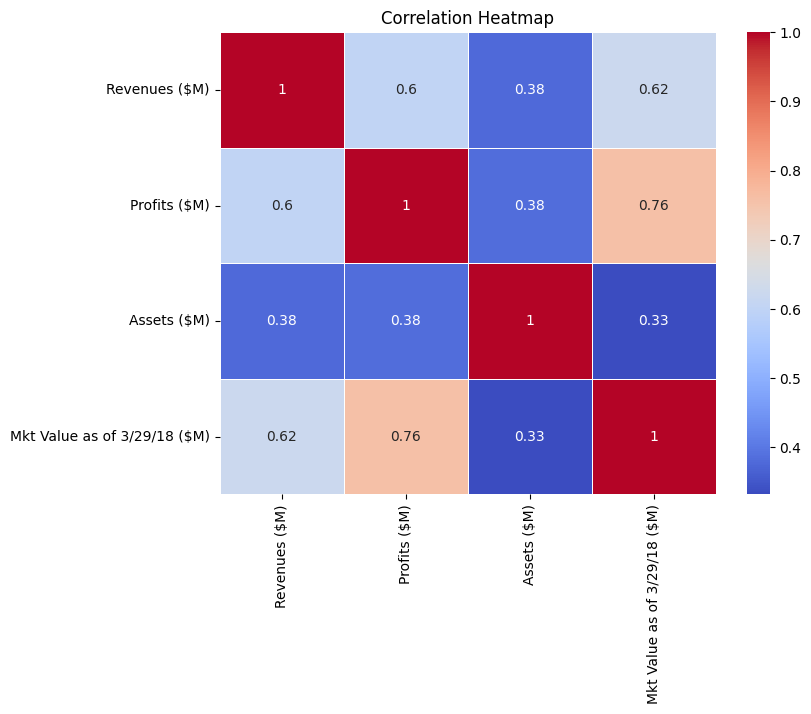

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('/home/archellius-anami/Downloads/fortune1000_final.csv', encoding='ISO-8859-1')

# Function to clean and convert values
def clean_and_convert(value):
    # Remove '$' and ','
    value = value.replace('$', '').replace(',', '')
    
    # If the value contains parentheses, treat it as negative
    if '(' in value and ')' in value:
        value = '-' + value.strip('()')
    
    # Replace any empty values or unwanted characters with NaN
    if value == '-' or value == '':
        return np.nan
    return float(value)

# Clean and convert columns
df['Revenues ($M)'] = df['Revenues ($M)'].apply(clean_and_convert)
df['Profits ($M)'] = df['Profits ($M)'].apply(clean_and_convert)
df['Assets ($M)'] = df['Assets ($M)'].apply(clean_and_convert)
df['Mkt Value as of 3/29/18 ($M)'] = df['Mkt Value as of 3/29/18 ($M)'].apply(clean_and_convert)
# Basic Descriptive Statistics
print(df[['Revenues ($M)', 'Profits ($M)', 'Assets ($M)', 'Mkt Value as of 3/29/18 ($M)']].describe())

# Profit Margin: Profits / Revenues
df['Profit Margin'] = df['Profits ($M)'] / df['Revenues ($M)']

# Visualizations
# 1. Bar chart for Top 10 companies by revenue
top_10_revenue = df.nlargest(10, 'Revenues ($M)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenues ($M)', y='title', data=top_10_revenue)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue ($M)')
plt.ylabel('Company')
plt.show()

# 2. Boxplot of Profit Margins
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sector', y='Profit Margin', data=df)
plt.title('Profit Margin by Sector')
plt.xlabel('Sector')
plt.ylabel('Profit Margin')
plt.xticks(rotation=90)
plt.show()

# 3. Scatter plot of Revenue vs. Market Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenues ($M)', y='Mkt Value as of 3/29/18 ($M)', data=df)
plt.title('Revenue vs Market Value')
plt.xlabel('Revenue ($M)')
plt.ylabel('Market Value ($M)')
plt.show()

# 4. Correlation Heatmap
corr_matrix = df[['Revenues ($M)', 'Profits ($M)', 'Assets ($M)', 'Mkt Value as of 3/29/18 ($M)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
